<a id="Introduction"></a> 


<center><img src="..\Photos\My project-10-fixed.png" width="900" height="200"><center>


<center><h1>🚩 Exploring Netflix Data 🚩</h1></center>
    
# Introduction
Are you curious about the content available on Netflix? Have you ever wondered which countries produce the most content, or which genres are the most popular?

In this project, we'll be exploring a dataset of Netflix content to answer these questions and more. Using various data analysis techniques, we'll be able to gain insights into the world of Netflix and the content available on the platform.

> **🟢 Goal**: The goal of this notebook is to analyze the Netflix dataset and uncover interesting patterns and trends in the content available on the platform. We will explore factors such as country of production, genre, release year, and more to gain insights into the world of Netflix.    
    

**💡 Helpful Notes**:
* we have a `.csv` dataset - `/kaggle/input/netflix-data-cleaning-analysis-and-visualization/netflix1.csv` with 10 columns and 8790 rows
* 100 episodes * 3 notebooks presented per episode = 300 total observations.

    
<img src="https://giphy.com/clips/BlownAway-netflix-blown-away-yMc3kXcwVh6utp8hkm">

    
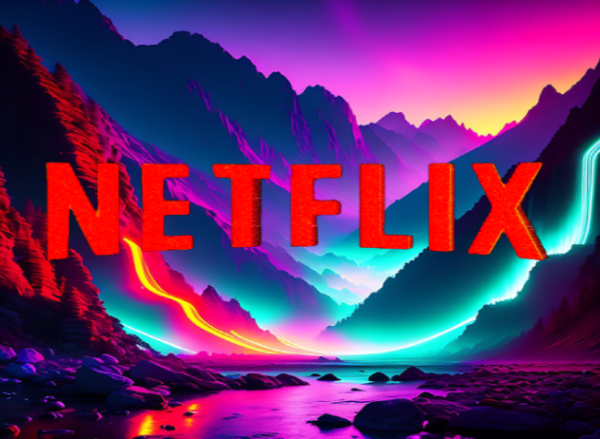

# 📚 Libraries 

Notebook Color Scheme:


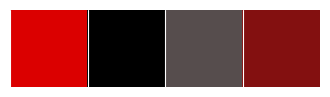

In [64]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from itertools import cycle
import plotly.io as pio
import plotly.express as px
from plotly.subplots import make_subplots


# set style 


pio.templates.default = "plotly_dark"
plt.style.use('seaborn-darkgrid')
sns.set_style("darkgrid")

mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

class clr:
    S = '\033[1m' + '\033[95m'
    E = '\033[0m'


# Color palette

my_colors = ["#db0000", "#000000", "#564d4d", "#831010"]

print(clr.S+"Notebook Color Scheme:"+clr.E)
sns.palplot(sns.color_palette(my_colors))
plt.show()

In [65]:
# Run this to enable CSS stype
# WARNING: run it in a separate cell, not alongside other code blocks too
from IPython.core.display import HTML
def css_styling():
    styles = open("../alerts-21/alerts.css", "r").read()
    return HTML("<style>"+styles+"</style>")
css_styling()

### 📌 Add COLOR to highligh

When writing out your reseach, use <span style="background:#EFC459; font-weight:bold; color:black">color</span> to emphasise something important. You can use different <span style="background:#4468B3; font-weight:bold; color:black">tones</span> to emphasise what you mean (for example, <span style="background:#EE4901; font-weight:bold; color:black">red</span> might be a disclaimer, or something bad, while <span style="background:#8CC79C; font-weight:bold; color:black">green</span> might represent something positive).

### Helpful Functions


In [66]:
# ===== Plot values on bars =====
def show_values_on_bars(axs, h_v="v", space=0.4):
    '''Plots the value at the end of the a seaborn barplot.
    axs: the ax of the plot
    h_v: weather or not the barplot is vertical/ horizontal'''
    
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, format(value, ','), ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, format(value, ','), ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
# ===== Insert image in Plot =====
def insert_image(path, zoom, xybox, ax):
    '''Insert an image within matplotlib'''
    imagebox = OffsetImage(mpimg.imread(path), zoom=zoom)
    ab = AnnotationBbox(imagebox, xy=(0.5, 0.7), frameon=False, pad=1, xybox=xybox)
    ax.add_artist(ab)
    

# 📥 Importing and Wrangling data types 

In [67]:
# Read in the dataframe
df = pd.read_csv("../Data/netflix1.csv")

df.head(3)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"


In [68]:
print(clr.S+"The dataset has a size of:"+clr.E, df.shape, "\n")

print(clr.S+"Missing values:"+clr.E)
df.isna().sum()

The dataset has a size of: (8790, 10) 

Missing values:


show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [70]:
# convert selected columns to string data type
df = df.astype({'title': 'string', 'director': 'string', 'country': 'string',
                'rating': 'string', 'listed_in': 'string'})

# convert date_added to datetime data type
df['date_added'] = pd.to_datetime(df['date_added'], format = '%m/%d/%Y')

# print data types after converting
print(df.dtypes)

show_id                 object
type                    object
title                   string
director                string
country                 string
date_added      datetime64[ns]
release_year             int64
rating                  string
duration                object
listed_in               string
dtype: object


In [71]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


# Exploring different features 

[Text(0.5, 1.0, 'Top 9 Duration Values'),
 Text(0.5, 0, 'Duration'),
 Text(0, 0.5, 'Count')]

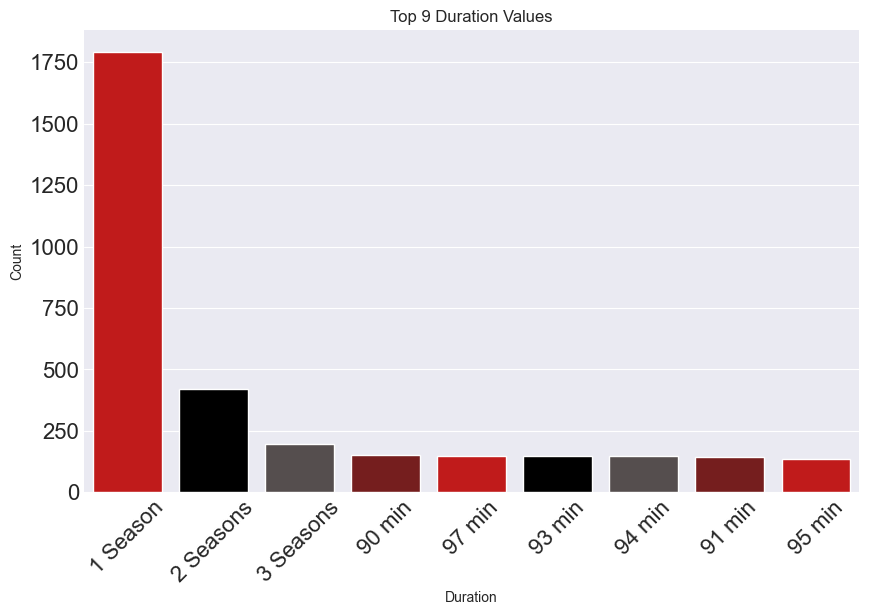

In [72]:
# Get the value counts of the duration column
duration_counts = df['duration'].value_counts()

# Get the top 9 values
top_9_values = duration_counts[:9]

# Create a barplot for the top 9 values
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=top_9_values.index, y=top_9_values.values, ax=ax, palette=my_colors)
plt.xticks(rotation=45)
ax.set(title='Top 9 Duration Values', xlabel='Duration', ylabel='Count')


In [73]:
import plotly.graph_objs as go

# Create a trace for the bar chart
trace = go.Bar(x=top_9_values.index, y=top_9_values.values, 
               marker=dict(color=my_colors))

# Set the layout for the chart
layout = go.Layout(title='Top 9 Duration Values', xaxis=dict(title='Duration'), 
                   yaxis=dict(title='Count'), height=500, width=800)

# Create the figure and plot it
fig = go.Figure(data=[trace], layout=layout)
fig.show()


# What is the distribution of movie and TV show releases over time?

Text(0.5, 1.0, 'types_of_show')

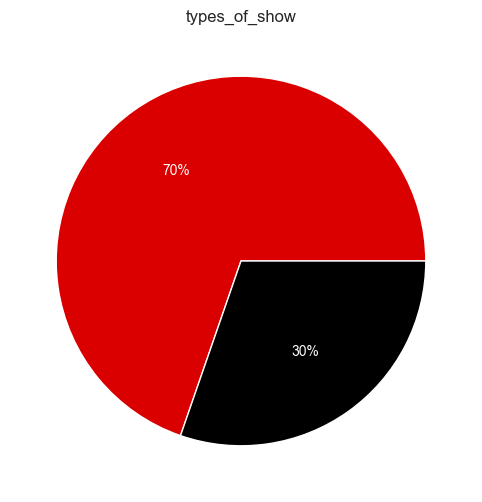

In [74]:
type_mov = df['type'].value_counts()
plt.figure(figsize = (10, 6))
plt.pie(type_mov, autopct='%1.0f%%',labels=type_mov.keys(),  colors=my_colors, textprops={'color':"w"})
plt.title('types_of_show')
#plt.show()

# What are the most popular directors? 

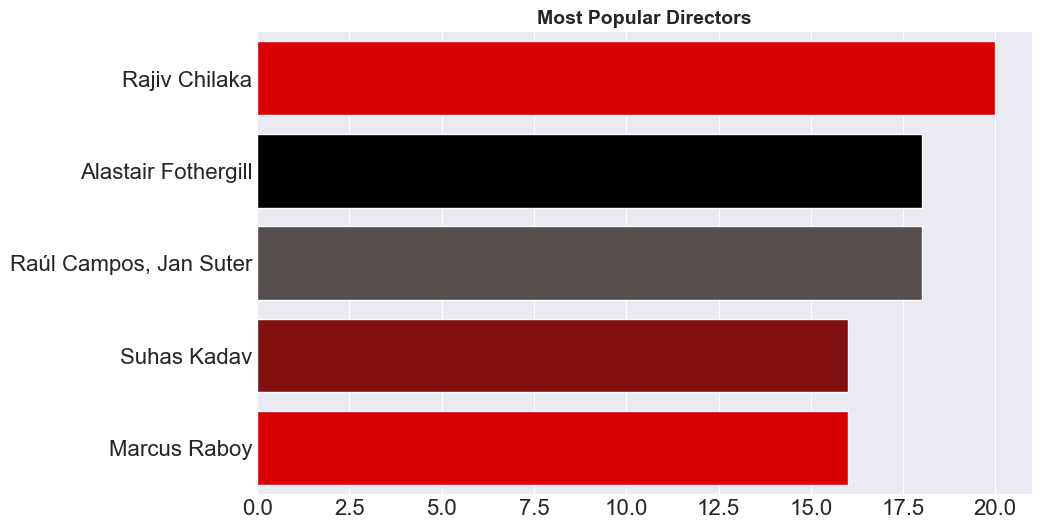

In [75]:
plt.figure(figsize = (10, 6))
most_pop_dir = df['director'].value_counts().drop('Not Given').head()
sns.barplot(x = most_pop_dir.values, y  = most_pop_dir.index , saturation = 1,palette=my_colors, alpha = 1)
plt.title("Most Popular Directors", fontsize = 14, fontweight = 'heavy')
plt.show()

# Which countries produce the most movies and TV shows?

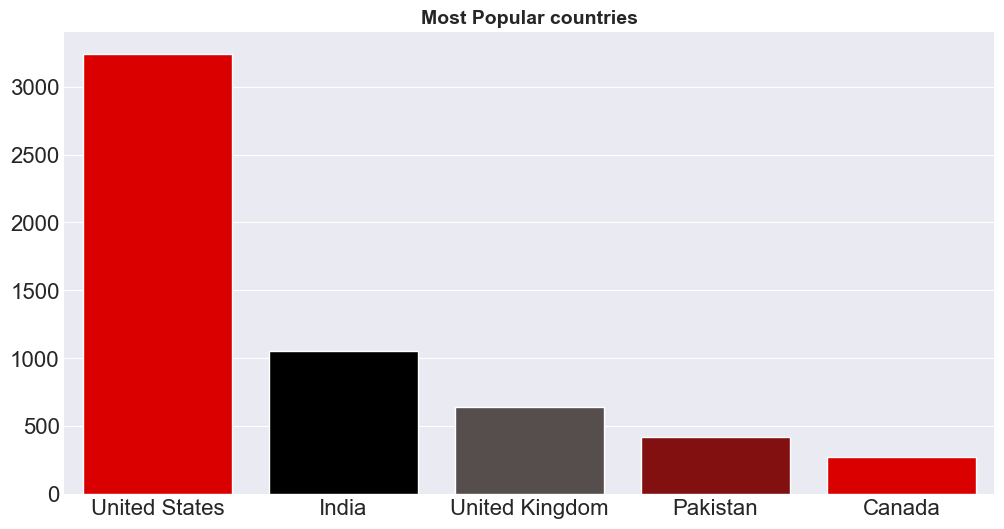

In [76]:
plt.figure(figsize=(12,6))
most_pop_cou = df['country'].value_counts().drop('Not Given').head()
sns.barplot(x=most_pop_cou.index, y =most_pop_cou.values,saturation = 1,palette=my_colors)
plt.title("Most Popular countries", fontsize = 14, fontweight = 'heavy')
plt.show()

In [77]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [78]:
grouped = pd.DataFrame(df.groupby(['release_year', 'type'])['type'].count())
grouped.rename(columns={"type": "type_count"}, inplace=True)
grouped.reset_index()

,release_year,type,type_count
0,1925,TV Show,1
1,1942,Movie,2
2,1943,Movie,3
3,1944,Movie,3
4,1945,Movie,3
...,...,...,...
114,2019,TV Show,397
115,2020,Movie,517
116,2020,TV Show,436
117,2021,Movie,277
